<a href="https://colab.research.google.com/github/aswx12/MatteLab/blob/Lucas/Mattelab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

In [99]:
github_url = 'https://github.com/aswx12/MatteLab/raw/refs/heads/main/Data_source.xlsx'

try:
    df = pd.read_excel(github_url)
    print("Loaded")
    display(df.head())
except Exception as e:
    print(f"Error: {e}")

Loaded


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


EXERCISE 1.1

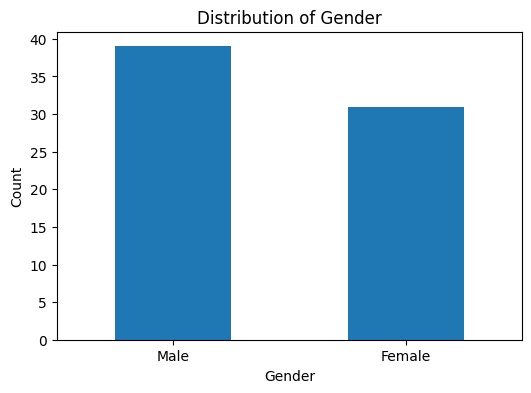

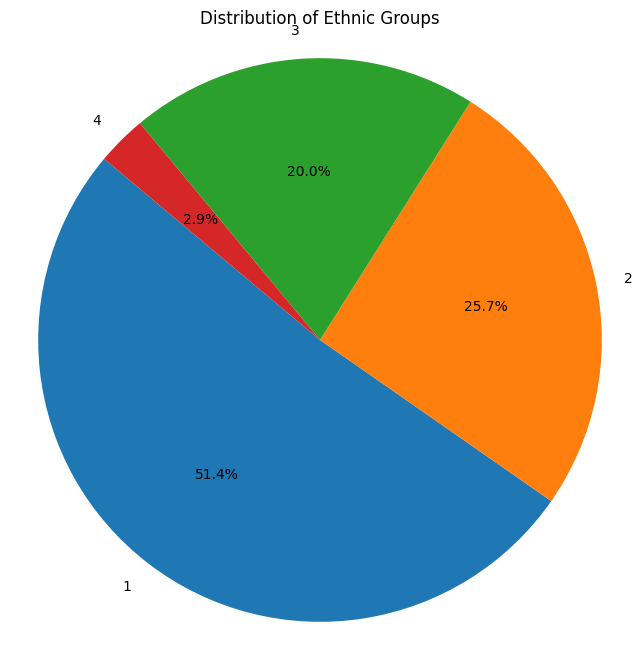

In [100]:
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Create a bar chart for gender
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

# Count the occurrences of each ethnic group
ethnic_counts = df['ethnicgp'].value_counts()

# Create a pie chart for ethnic groups
plt.figure(figsize=(8, 8))
plt.pie(ethnic_counts, labels=ethnic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ethnic Groups')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



b)

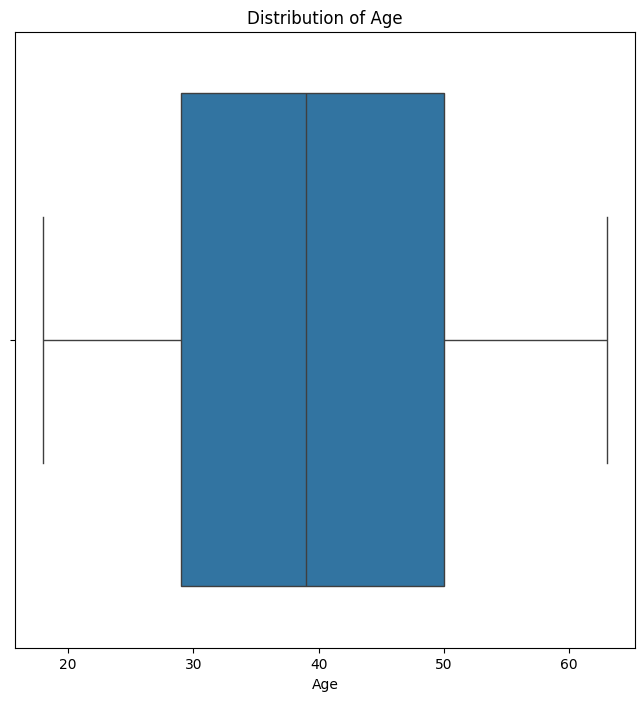

Max: 63.0
Min: 18.0
Median:  39.0
First quantile:  29.0
Third quantile:  50.0


In [101]:
max = df['age'].max()
min = df['age'].min()
median = df['age'].median()
firstQ = df['age'].quantile(.25)
thirdQ =  df['age'].quantile(.75)

plt.figure(figsize=(8, 8))
sns.boxplot(x=df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')

plt.show()

print('Max:', max)
print('Min:', min)
print('Median: ', median)
print('First quantile: ', firstQ)
print('Third quantile: ', thirdQ)

Excersise 2

67
67
Intercept b0:  16.325322949730566
Slope b1: -0.14312024802539314
R2:  0.06243389452270087
Model:  16.325322949730566 + -0.14312024802539314 *absence


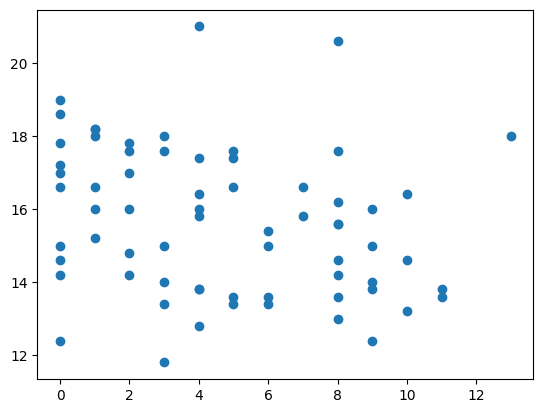

In [102]:
plt.scatter(df['absence'], df['income'])

df_noNaN = df.dropna(subset=['income','absence'])
print(df_noNaN['income'].size)
print(df_noNaN['absence'].size)
x=df_noNaN[['absence']]
y=df_noNaN['income']

reg = LinearRegression().fit(x, y)

b0=reg.intercept_
b1= reg.coef_[0]
r2 = reg.score(x, y)
print("Intercept b0: ",b0)
print("Slope b1:", b1)
print("R2: ", r2)
print("Model: ",b0,"+",b1,"*absence")

Excersice 1.3

In [103]:
df_noNaN = df.dropna(subset=['satis','commit','autonom', 'income', 'skill', 'qual', 'age', 'years'])

x=df_noNaN[['commit', 'autonom', 'income', 'skill', 'qual', 'age', 'years']]
#x=df_noNaN[['commit', 'autonom', 'income', 'skill', 'qual']] #- Check if age and years are the insignificant values
y=df_noNaN['satis']

reg = LinearRegression().fit(x, y)

b0=reg.intercept_
b1= reg.coef_
#last 2 values has little to no impact - drop them (age and years)
b1 = np.delete(b1, 6)
b1 = np.delete(b1, 5)
r2 = reg.score(x, y)

print("Intercept b0: ",b0)
print("Slope b1:", b1)
print("R2: ", r2)
print("Model: ",b0,"+",b1,"*satis")

Intercept b0:  -4.554519821609974
Slope b1: [0.96539385 0.39533784 0.4141398  0.61046696 0.23287208]
R2:  0.80923145994162
Model:  -4.554519821609974 + [0.96539385 0.39533784 0.4141398  0.61046696 0.23287208] *satis


Excersice 1.4

In [104]:
a = df.dropna(subset=['gender','satis'])
satisfaction = a['satis']
print(DescrStatsW(satisfaction).tconfint_mean(0.05))
print(st.t.interval(0.95, len(satisfaction)-1, loc=np.mean(satisfaction), scale=st.sem(satisfaction)))

a.groupby('gender')['satis'].mean()
meMean = a.groupby('gender')['satis'].mean()[1]
feMean = a.groupby('gender')['satis'].mean()[2]

men = a[a['gender'] == 1]['satis']
women = a[a['gender'] == 2]['satis']

meanDiff= meMean - feMean
print(meanDiff) # positive diff -> men on average more satisfied
cm = CompareMeans(DescrStatsW(men), DescrStatsW(women))
print(cm.tconfint_diff(alpha=0.05))  # 95% CI for mean difference
#st.t.interval(0.95, len(a)-1, meanDiff, )


(np.float64(10.038594940808448), np.float64(11.637875647426846))
(np.float64(10.038594940808448), np.float64(11.637875647426846))
0.23626852659110753
(np.float64(-1.3808003171142542), np.float64(1.8533373702964693))


Excersice 1.5

In [105]:
gender_skill = df[['gender','skill']]
gender_skill = gender_skill.dropna()
print(gender_skill.groupby('gender')['skill'].agg(['mean', 'std', 'count']))

result = st.mannwhitneyu(gender_skill[gender_skill['gender'] == 1]['skill'], gender_skill[gender_skill['gender'] == 2]['skill'])
print(result)
#If pvalue < 0.05: significant difference between groups

#If pvalue ≥ 0.05: no significant difference detected


cm = CompareMeans(DescrStatsW(gender_skill[gender_skill['gender'] == 1]['skill']), DescrStatsW(gender_skill[gender_skill['gender'] == 2]['skill']))
print(cm.tconfint_diff(alpha=0.05))  # 95% CI for mean difference

            mean       std  count
gender                           
1       2.769231  1.037749     39
2       2.354839  1.081616     31
MannwhitneyuResult(statistic=np.float64(733.0), pvalue=np.float64(0.1173277835474177))
(np.float64(-0.0932877489941063), np.float64(0.9220718681008057))


Excersice 1.6

In [106]:
abscence_ethnicgp = df[['absence','ethnicgp']]
abscence_ethnicgp = abscence_ethnicgp.dropna()

#group absence values in enthic groups
groups = [group['absence'].values for ethnic, group in abscence_ethnicgp.groupby('ethnicgp')]
stat, p = st.kruskal(*groups)

print(f"Kruskal–Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.4f}")

#If p < 0.05, reject H₀ → there’s a significant difference in absence between at least two ethnic groups.

stat, p = st.f_oneway(*groups)

print("\nAnova")
print(f"F-statistic: {stat:.3f}")
print(f"p-value: {p:.4f}")

#if p < 0.05: Reject H₀ → There is a significant difference in job absence among the ethnic groups.

Kruskal–Wallis H-statistic: 3.411
p-value: 0.3324

Anova
F-statistic: 1.150
p-value: 0.3357


Excersice 1.7

In [135]:
noNan_income = df.dropna(subset=['income'])
noNan_income = noNan_income.copy()

#low = Min-Q1, middle = Q1-Q3, high= Q3-Max

max = df['income'].max()
min = df['income'].min()
firstQ = df['income'].quantile(.25)
thirdQ =  df['income'].quantile(.75)

bins = [min, firstQ, thirdQ, max]
labels = [1, 2, 3] #1 =low, 2 = middle, 3= high

noNan_income['income_class'] = pd.cut(noNan_income['income'], bins=bins, labels=labels)

display(noNan_income.head(10))

#group skill values in  income class
groups = [group['skill'].values for income, group in noNan_income.groupby('income_class', observed =False)]
stat, p = st.kruskal(*groups)

print(f"Kruskal–Wallis H-statistic: {stat:.3f}")
print(f"p-value: {p:.4f}")

#If p < 0.05, reject H₀ → there’s a significant difference in absence between at least two ethnic groups.


,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income,income_class
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6,2
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6,2
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8,3
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4,2
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6,3
5,6,1,1,54.0,31.0,2.0,9.0,6,16,1,1,3.0,4,1.0,16.0,2
6,7,1,1,29.0,2.0,NaN,11.0,9,14,2,3,5.0,2,0.0,16.6,2
7,8,3,1,35.0,2.0,5.0,14.0,12,11,2,3,4.0,4,2.0,17.6,3
8,9,2,2,33.0,4.0,3.0,12.0,10,9,2,2,1.0,1,5.0,17.6,3
9,10,2,2,27.0,6.0,4.0,13.0,8,15,1,2,2.0,4,4.0,13.8,1


Kruskal–Wallis H-statistic: 7.709
p-value: 0.0212
